In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import TruncatedSVD
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score

# 1. 데이터 로드
data = load_breast_cancer()
X=data.data
y=data.target

# 데이터셋을 학습 세트와 테스트 세트로 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 파이프 라인 구성
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svd', TruncatedSVD(n_components=10)),
    ('logreg', LogisticRegression(max_iter=100, random_state=42))
])

param_grid = {
    'svd__n_components': [2, 5, 10],
    'logreg__C': [0.1, 1, 10]
}

# Grid SearchCV를 이용한 하이퍼 파라미터 튜닝
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

#
print("Best Parameters found: ", grid_search.best_params_)
print("Best Score: ", grid_search.best_score_)


# 사용자 평가 함수 정의
def evaluate_model(model, X_test, y_test):
  # 예측 수행
  y_pred = model.predict(X_test)

  # 정확도 계산
  accuracy = accuracy_score(y_test, y_pred)

  # 분류 보고서
  report = classification_report(y_test, y_pred)

  # ROC AUC
  y_pred_prob = model.predict_proba(X_test)[:, 1]
  roc = roc_auc_score(y_test, y_pred_prob)
  # 결과 출력
  print(f"Test Accuracy: {accuracy:.4f}")
  print(f"Classification Report:\n", report)
  print(f"ROC AUC Score: {roc:.4f}")

evaluate_model(grid_search, X_test, y_test)

#### California_housing 데이터셋으로 아래사항을 참조하여 주택가격을 예측하는 회귀모델을 개발하세요.

- 전체 회귀모델을 적용
- 각 모델별 최적 하이퍼파라미터 - GridSearchCV 활용
- 평가지수 MSE 기준으로 가장 성능이 좋은 모델과 파라미터를 적용하여 평가 결과를 출력

In [12]:
from sklearn.datasets import fetch_california_housing
import pandas as pd

# 데이터 로드
data = fetch_california_housing()
X, y = data.data, data.target

# 데이터프레임 변환
df = pd.DataFrame(data=X, columns=data.feature_names)
df['target'] = y

In [3]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   target      20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [5]:
# 데이터 null값은 없음. 데이터 이상치 확인하기
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


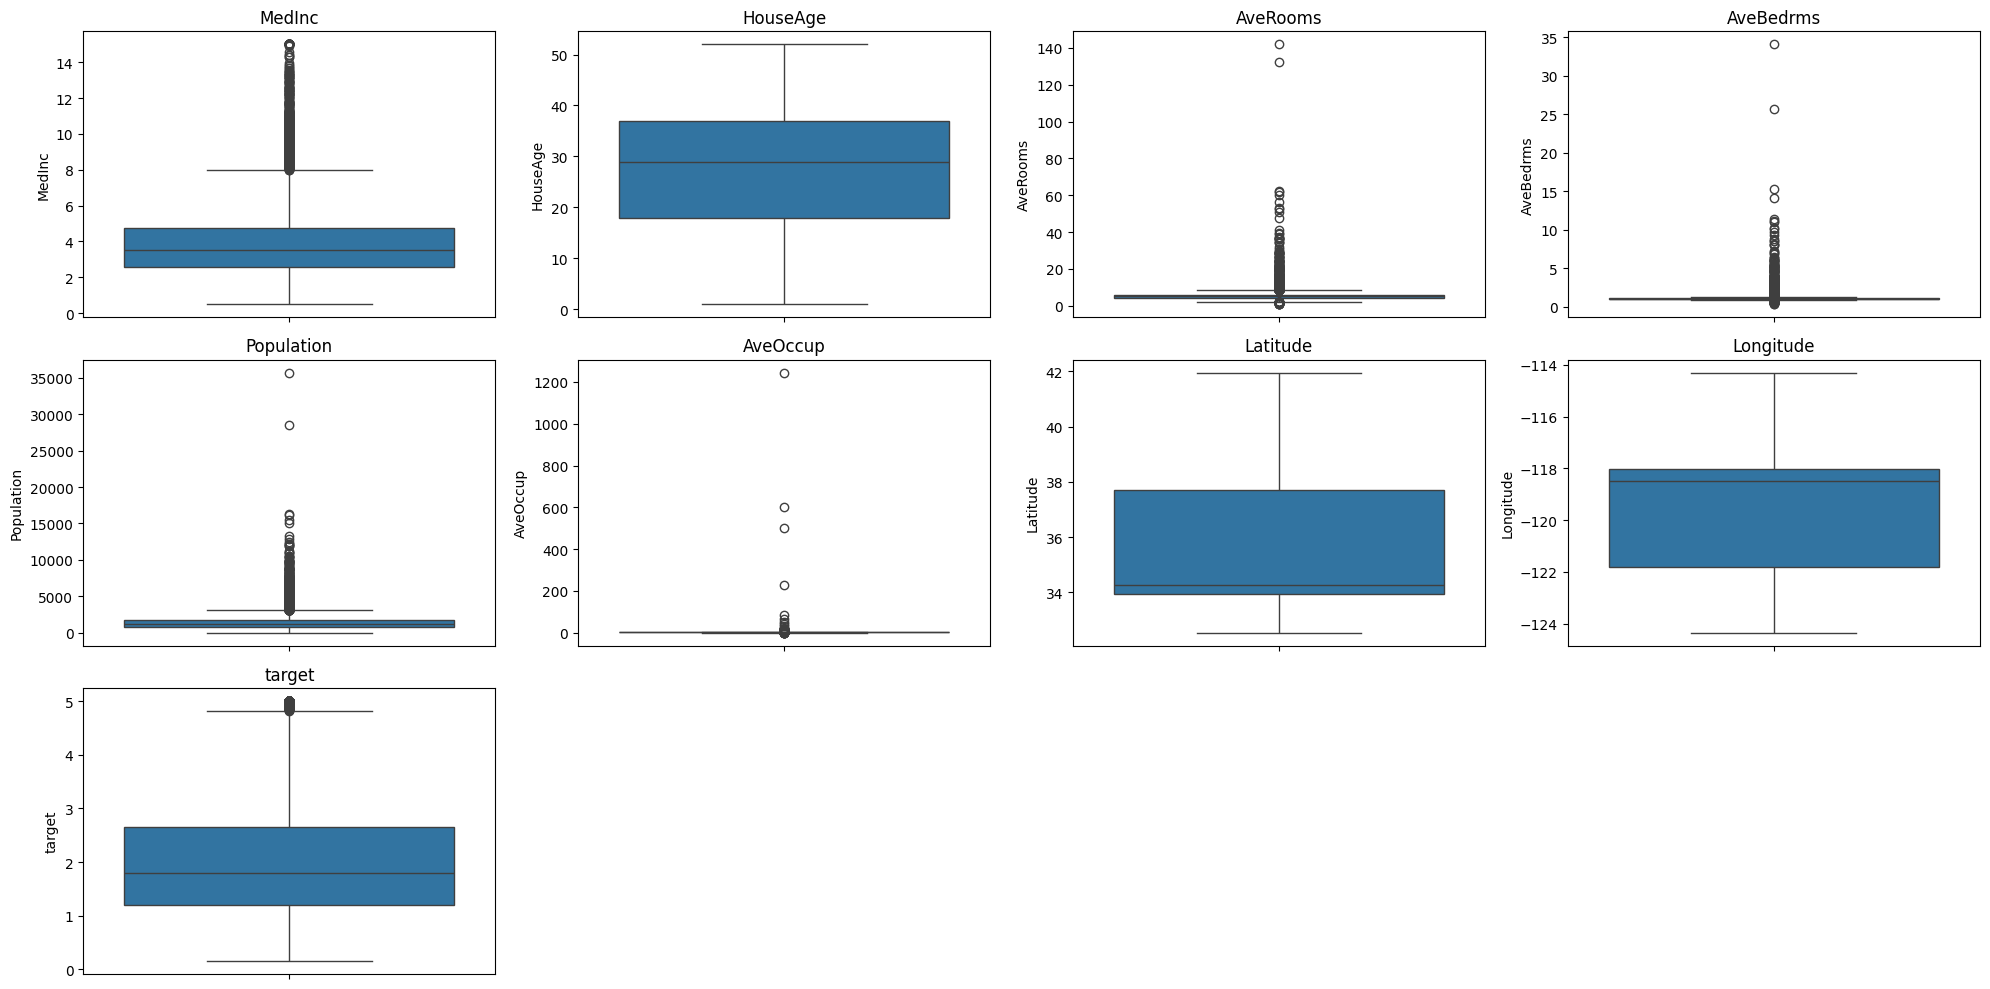

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Boxplot 시각화
plt.figure(figsize=(20, 10))
for i, column in enumerate(df.columns, 1):
    plt.subplot(3, 4, i)
    sns.boxplot(df[column])
    plt.title(column)
plt.tight_layout()
plt.show()

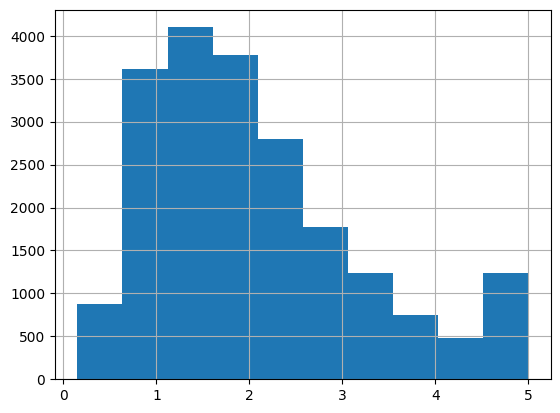

In [13]:
# Target Histogram

df['target'].hist()
plt.show()

In [15]:
import numpy as np

# Target에서 이상치 제거

Q1 = df['target'].quantile(0.25)
Q3 = df['target'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df = df[(df['target'] >= lower_bound) & (df['target'] <= upper_bound)]

# 데이터 로그 변환
df['target'] = np.log1p(df['target'])

<ipython-input-15-9f01cf9e8ef4>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['target'] = np.log1p(df['target'])


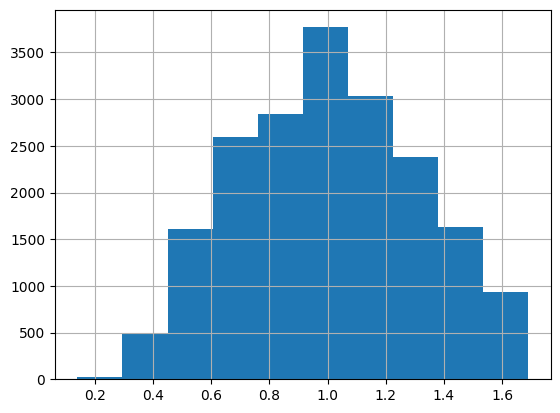

In [16]:
# Target Histogram

df['target'].hist()
plt.show()

In [20]:
from sklearn.preprocessing import StandardScaler

# 데이터 분리 및 스케일링
X = df.drop('target', axis=1)
y = df['target']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [23]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
import lightgbm as lgb
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# 파이프라인 생성
pipelines = {
    'LinearRegression': Pipeline([('scaler', StandardScaler()), ('model', LinearRegression())]),
    'Ridge': Pipeline([('scaler', StandardScaler()), ('model', Ridge())]),
    'Lasso': Pipeline([('scaler', StandardScaler()), ('model', Lasso())]),
    'ElasticNet': Pipeline([('scaler', StandardScaler()), ('model', ElasticNet())]),
    'DecisionTreeRegressor': Pipeline([('scaler', StandardScaler()), ('model', DecisionTreeRegressor())]),
    'RandomForestRegressor': Pipeline([('scaler', StandardScaler()), ('model', RandomForestRegressor())]),
    'GradientBoostingRegressor': Pipeline([('scaler', StandardScaler()), ('model', GradientBoostingRegressor())]),
    'KNeighborsRegressor': Pipeline([('scaler', StandardScaler()), ('model', KNeighborsRegressor())]),
    'SVR': Pipeline([('scaler', StandardScaler()), ('model', SVR())]),
    'LightGBM': Pipeline([('scaler', StandardScaler()), ('model', lgb.LGBMRegressor())])
}

param_grids = {
    'LinearRegression': {},
    'Ridge': {'model__alpha': [0.1, 1, 10, 100]},
    'Lasso': {'model__alpha': [0.1, 1, 10, 100]},
    'ElasticNet': {'model__alpha': [0.1, 1, 10, 100], 'model__l1_ratio': [0.1, 0.5, 0.9]},
    'DecisionTreeRegressor': {'model__max_depth': [3, 5, 7, 10]},
    'RandomForestRegressor': {'model__n_estimators': [50, 100, 200], 'model__max_depth': [3, 5, 7, 10]},
    'GradientBoostingRegressor': {'model__n_estimators': [50, 100, 200], 'model__learning_rate': [0.1, 0.2]},
    'KNeighborsRegressor': {'model__n_neighbors': [3, 5, 7, 10]},
    'SVR': {'model__C': [0.1, 1, 10], 'model__kernel': ['linear', 'rbf']},
    'LightGBM': {'model__n_estimators': [50, 100, 200], 'model__learning_rate': [0.1, 0.2]}
}

best_models = {}
best_params = {}
best_scores = {}
results = []

for name, pipeline in pipelines.items():
    grid_search = GridSearchCV(pipeline, param_grids[name], cv=5, scoring='neg_mean_squared_error')
    grid_search.fit(X, y)
    best_models[name] = grid_search.best_estimator_
    best_params[name] = grid_search.best_params_
    best_scores[name] = -grid_search.best_score_

    results.append((name, best_scores[name], best_params[name]))

# 모델 평가 함수
def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    return mse

# 최종 평가 및 출력
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

for name, score, params in results:
    model = best_models[name]
    mse = evaluate_model(model, X_train, y_train, X_test, y_test)
    print(f"Model: {name}")
    print(f"Best Parameters: {params}")
    print(f"Best CV MSE: {score}")
    print(f"Test MSE: {mse}")
    print()

final_model_name = min(best_scores, key=best_scores.get)
final_model = best_models[final_model_name]
final_params = best_params[final_model_name]
final_mse = evaluate_model(final_model, X_train, y_train, X_test, y_test)

print(f"Best Model: {final_model_name}")
print(f"Best Parameters: {final_params}")
print(f"Final MSE: {final_mse}")

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002352 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1838
[LightGBM] [Info] Number of data points in the train set: 15437, number of used features: 8
[LightGBM] [Info] Start training from score 1.037849
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002238 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1838
[LightGBM] [Info] Number of data points in the train set: 15437, number of used features: 8
[LightGBM] [Info] Start training from score 0.989742
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002079 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1838
[LightGBM] [Info] Number of data points in the train set: 15438, number of used features: 8
[LightGBM] [Info] Start traini

In [ ]:
Model: LinearRegression
Best Parameters: {}
Best CV MSE: 0.04177437955680261
Test MSE: 0.03881781770007519

Model: Ridge
Best Parameters: {'model__alpha': 10}
Best CV MSE: 0.04177072941811157
Test MSE: 0.03880283188516151

Model: Lasso
Best Parameters: {'model__alpha': 0.1}
Best CV MSE: 0.07059523093260786
Test MSE: 0.06733560504469423

Model: ElasticNet
Best Parameters: {'model__alpha': 0.1, 'model__l1_ratio': 0.1}
Best CV MSE: 0.05220876196450776
Test MSE: 0.047703905137928444

Model: DecisionTreeRegressor
Best Parameters: {'model__max_depth': 7}
Best CV MSE: 0.05136578550902491
Test MSE: 0.03659593272430464

Model: RandomForestRegressor
Best Parameters: {'model__max_depth': 10, 'model__n_estimators': 100}
Best CV MSE: 0.03497784114163115
Test MSE: 0.020514107669810794

Model: GradientBoostingRegressor
Best Parameters: {'model__learning_rate': 0.2, 'model__n_estimators': 100}
Best CV MSE: 0.030222865106303114
Test MSE: 0.018601789826108328

Model: KNeighborsRegressor
Best Parameters: {'model__n_neighbors': 10}
Best CV MSE: 0.042315172097015165
Test MSE: 0.02888547630202605

Model: SVR
Best Parameters: {'model__C': 1, 'model__kernel': 'rbf'}
Best CV MSE: 0.03149488906604657
Test MSE: 0.02339521950508384

Model: LightGBM
Best Parameters: {'model__learning_rate': 0.1, 'model__n_estimators': 100}
Best CV MSE: 0.029711124743801748
Test MSE: 0.015971423594406172

#################################

Best Model: LightGBM

Best Parameters: {'model__learning_rate': 0.1, 'model__n_estimators': 100}

Final MSE: 0.015971423594406172

모든 회귀 모델 중 가장 성능이 좋은 모델은 LightGBM,

파라메터는 'model__learning_rate': 0.1, 'model__n_estimators': 100로 나타났습니다.

MSE는 0.0159입니다.